Wine dataset information:
Number of samples: 178
Number of features: 13
Target names: ['class_0' 'class_1' 'class_2']
No missing values found in the Wine dataset.

Stochastic Gradient Descent (SGD) results for Regularizations parameter( l1 ):
Training Time: 0.0029935836791992188 seconds
Accuracy: 1.0
Root Mean square 0.0
Learning Curve, this shows the learning curve for the wine dataset. Y axis is the accuracy and the X axis is the number of samples.


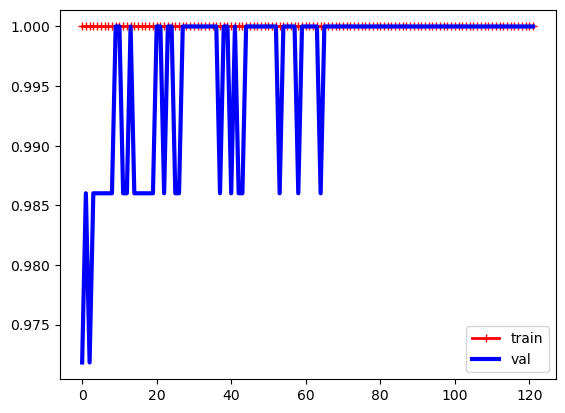


Stochastic Gradient Descent (SGD) results for Regularizations parameter( l2 ):
Training Time: 0.0034973621368408203 seconds
Accuracy: 1.0
Root Mean square 0.0
Learning Curve, this shows the learning curve for the wine dataset. Y axis is the accuracy and the X axis is the number of samples.


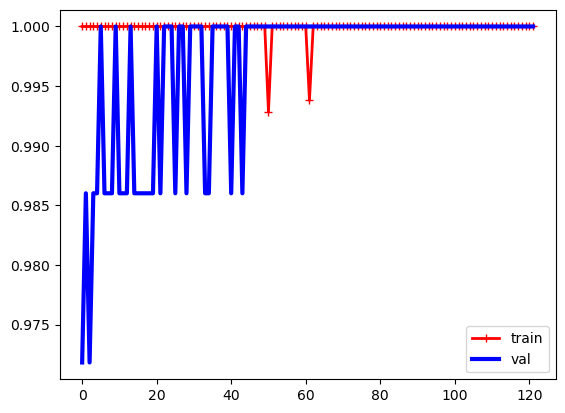


Stochastic Gradient Descent (SGD) results for Regularizations parameter( elasticnet ):
Training Time: 0.006986856460571289 seconds
Accuracy: 1.0
Root Mean square 0.0
Learning Curve, this shows the learning curve for the wine dataset. Y axis is the accuracy and the X axis is the number of samples.


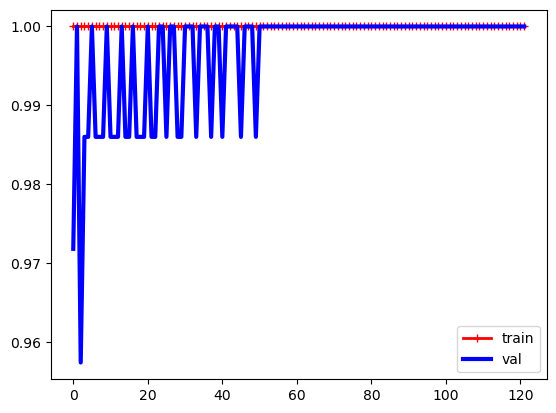



Batch Gradient Descent (BGD) results for Regularizations parameter( l2 ):
Training Time: 0.011724233627319336 seconds
Accuracy: 1.0
Root Mean square 0.0
Learning Curve, this shows the learning curve for the wine dataset. Y axis is the accuracy and the X axis is the number of samples.


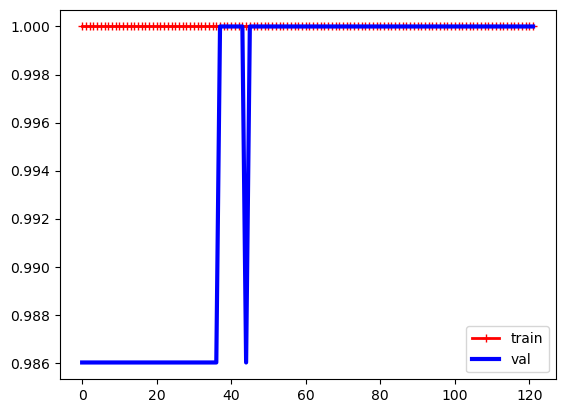

In [3]:
# Importing necessary libraries
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target
print("Wine dataset information:")
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])
print("Target names:", wine_data.target_names)
missing_values = False
for column in range(X.shape[1]):
    if any(np.isnan(X[:, column])):
        print(f"Column {column} has missing values.")
        missing_values = True

if not missing_values:
    print("No missing values found in the Wine dataset.")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def plot_learning_curves(model, X_train, X_test, y_train, y_test):
    X_train, X_val, y_train, y_val = X_train, X_test, y_train, y_test
    train_errors, val_errors = [], []
    for m in range(20, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(accuracy_score(y_train[:m], y_train_predict))
        val_errors.append(accuracy_score(y_val, y_val_predict))
    print("Learning Curve, this shows the learning curve for the wine dataset. Y axis is the accuracy and the X axis is the number of samples.")
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.show()


regularization_methods = ['l1', 'l2', 'elasticnet']
for reg in regularization_methods:
    sgd_model = SGDClassifier(loss='log_loss', penalty=reg, max_iter=1000, random_state=42, tol=1e-4)
    start_time = time.time()
    sgd_model.fit(X_train, y_train)
    sgd_train_time = time.time() - start_time
    sgd_pred = sgd_model.predict(X_test)
    sgd_accuracy = accuracy_score(y_test, sgd_pred)
    print()
    print("Stochastic Gradient Descent (SGD) results for Regularizations parameter(",reg,"):")
    print("Training Time:", sgd_train_time, "seconds")
    print("Accuracy:", sgd_accuracy)
    print("Root Mean square",mean_squared_error(y_test, sgd_pred))
    plot_learning_curves(sgd_model, X_train, X_test, y_train, y_test)

# Train BGD model
regularization_methods = ['l2']
for reg in regularization_methods:
    bgd_model = LogisticRegression(solver='lbfgs', penalty=reg, max_iter=1000, random_state=42, tol=1e-4)
    start_time = time.time()
    bgd_model.fit(X_train, y_train)
    bgd_train_time = time.time() - start_time
    bgd_pred = bgd_model.predict(X_test)
    bgd_accuracy = accuracy_score(y_test, bgd_pred)
    print()
    print("\nBatch Gradient Descent (BGD) results for Regularizations parameter(",reg,"):")
    print("Training Time:", bgd_train_time, "seconds")
    print("Accuracy:", bgd_accuracy)
    print("Root Mean square",mean_squared_error(y_test, bgd_pred))
    plot_learning_curves(bgd_model, X_train, X_test, y_train, y_test)
    

Accuracy can be an appropriate metric for evaluating the performance of a classification model on the Wine dataset. We can clearly see all the models can classify all the types of wines as the accuracy is 100%.